In [49]:
import os
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import os
import warnings
warnings.filterwarnings('ignore') 
from pandas_profiling import ProfileReport

In [50]:
%matplotlib inline

In [51]:
data = pd.read_csv('final.csv',parse_dates=[['Crash Time','DATE']])#合并日期

In [52]:
data.head()

,Crash Time_DATE,Unnamed: 0,ID,Month,Day of week,Road Surface Condition,Ambient Light,Weather Condition,PRCP,SNOW,TMAX,TMIN,lon,lat,label
0,2002-01-01 12:00:00,0,1,January,Tuesday,Dry,Daylight,Clear,0.0,0.0,36,13,41.948610,-71.277587,96
1,2002-01-02 04:26:00,1,2,January,Wednesday,Dry,Dusk,Clear,0.0,0.0,39,19,41.932683,-71.296220,75
2,2002-01-02 05:10:00,2,3,January,Wednesday,Wet,Dark - lighted roadway,Rain,0.0,0.0,39,19,41.948334,-71.277947,96
3,2002-01-02 11:10:00,4,5,January,Wednesday,Dry,Daylight,Clear,0.0,0.0,39,19,41.938218,-71.291080,85
4,2002-01-03 09:35:00,8,9,January,Thursday,Dry,Daylight,Clear,0.0,0.0,38,22,41.922646,-71.292404,74


In [53]:
print(data.shape)#10886条观测记录，12个属性
print(data.head())#前5条记录
print(data.dtypes)#每个属性的数据类型

(18177, 15)
      Crash Time_DATE  Unnamed: 0  ID    Month Day of week  \
0 2002-01-01 12:00:00           0   1  January     Tuesday   
1 2002-01-02 04:26:00           1   2  January   Wednesday   
2 2002-01-02 05:10:00           2   3  January   Wednesday   
3 2002-01-02 11:10:00           4   5  January   Wednesday   
4 2002-01-03 09:35:00           8   9  January    Thursday   

  Road Surface Condition           Ambient Light Weather Condition  PRCP  \
0                    Dry                Daylight             Clear   0.0   
1                    Dry                    Dusk             Clear   0.0   
2                    Wet  Dark - lighted roadway              Rain   0.0   
3                    Dry                Daylight             Clear   0.0   
4                    Dry                Daylight             Clear   0.0   

   SNOW  TMAX  TMIN        lon        lat  label  
0   0.0    36    13  41.948610 -71.277587     96  
1   0.0    39    19  41.932683 -71.296220     75  
2   0

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

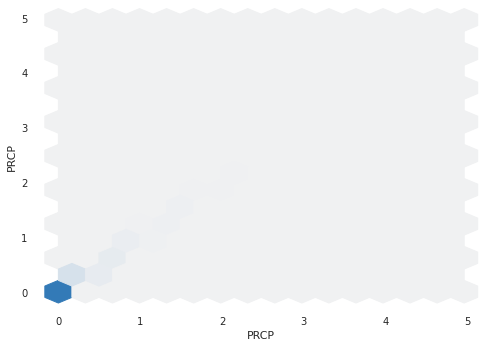

In [32]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("plots/car_crashes_report.html")
profile

In [54]:
data = data.drop(['ID','label'],axis=1)

# EDA & Feature

In [55]:
for df in [data]:
    df['year'] = df['Crash Time_DATE'].dt.year
    df['month'] = df['Crash Time_DATE'].dt.month
    df['day'] = df['Crash Time_DATE'].dt.day
    df['hour'] = df['Crash Time_DATE'].dt.hour

    df['hour_category'] = np.nan
    df['season'] = np.nan
    df['week'] = np.nan
    
    df.loc[(df.hour <= 9)&(df.hour >= 7), 'hour_category'] = "rush"
    df.loc[(df.hour <= 19)&(df.hour >= 16), 'hour_category'] = "rush"
    df.loc[(df.hour < 16)&(df.hour > 9), 'hour_category'] = "day"
    df.loc[(df.hour < 7)|(df.hour > 19), 'hour_category'] = "night"
    
    df.loc[(df.month <= 3)&(df.month >= 1), 'season'] = 1
    df.loc[(df.month <= 6)&(df.month >= 4), 'season'] = 2
    df.loc[(df.month <=9)&(df.month >= 7), 'season'] = 3
    df.loc[(df.month <=12)&(df.month >=10), 'season'] = 4
    
    df.loc[(df.day <= 7)&(df.day >= 1), 'week'] = 1
    df.loc[(df.day <= 14)&(df.day >= 8), 'week'] = 2
    df.loc[(df.day <=21)&(df.day >= 15), 'week'] = 3
    df.loc[(df.day >=22), 'week'] = 4

# Convert categorical variable into dummy variables

In [56]:
data.head()

,Crash Time_DATE,Unnamed: 0,Month,Day of week,Road Surface Condition,Ambient Light,Weather Condition,PRCP,SNOW,TMAX,TMIN,lon,lat,year,month,day,hour,hour_category,season,week
0,2002-01-01 12:00:00,0,January,Tuesday,Dry,Daylight,Clear,0.0,0.0,36,13,41.948610,-71.277587,2002,1,1,12,day,1.0,1.0
1,2002-01-02 04:26:00,1,January,Wednesday,Dry,Dusk,Clear,0.0,0.0,39,19,41.932683,-71.296220,2002,1,2,4,night,1.0,1.0
2,2002-01-02 05:10:00,2,January,Wednesday,Wet,Dark - lighted roadway,Rain,0.0,0.0,39,19,41.948334,-71.277947,2002,1,2,5,night,1.0,1.0
3,2002-01-02 11:10:00,4,January,Wednesday,Dry,Daylight,Clear,0.0,0.0,39,19,41.938218,-71.291080,2002,1,2,11,day,1.0,1.0
4,2002-01-03 09:35:00,8,January,Thursday,Dry,Daylight,Clear,0.0,0.0,38,22,41.922646,-71.292404,2002,1,3,9,rush,1.0,1.0


In [57]:
Surface_Condition = pd.get_dummies(data['Road Surface Condition'], prefix='Condition', prefix_sep='_')

Ambient_Light = pd.get_dummies(data['Ambient Light'], prefix='Light', prefix_sep='_')

Weather_Condition = pd.get_dummies(data['Weather Condition'], prefix='Weather', prefix_sep='_')

Hour = pd.get_dummies(data['hour_category'], prefix='Hour', prefix_sep='_')

Season = pd.get_dummies(data['season'], prefix='season', prefix_sep='_')

Week = pd.get_dummies(data['week'], prefix='week', prefix_sep='_')


In [58]:
data.columns

Index(['Crash Time_DATE', 'Unnamed: 0', 'Month', 'Day of week',
       'Road Surface Condition', 'Ambient Light', 'Weather Condition', 'PRCP',
       'SNOW', 'TMAX', 'TMIN', 'lon', 'lat', 'year', 'month', 'day', 'hour',
       'hour_category', 'season', 'week'],
      dtype='object')

In [59]:
Data_Master = pd.concat([data,
                          Surface_Condition,
                          Ambient_Light,
                          Weather_Condition,
                          Hour,
                          Season,
                          Week
                         ], axis=1)

In [60]:
data = Data_Master.drop(['Road Surface Condition','Ambient Light','Weather Condition',
                         'hour_category','Crash Time_DATE'], axis = 1)

In [61]:
split_size = 0.7
train = data[0:int(split_size*len(data))]
test = data[int(split_size*len(data))::]

In [62]:
X_train = train.drop(['lon','lat'], axis=1)
Y_train = pd.concat([train['lon'],train['lat']], axis=1)

X_test = test.drop(['lon','lat'], axis=1)
Y_test = pd.concat([test['lon'],test['lat']], axis=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18177 entries, 0 to 18176
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              18177 non-null  int64  
 1   Month                                   18177 non-null  object 
 2   Day of week                             18177 non-null  object 
 3   PRCP                                    18177 non-null  float64
 4   SNOW                                    18177 non-null  float64
 5   TMAX                                    18177 non-null  int64  
 6   TMIN                                    18177 non-null  int64  
 7   lon                                     18177 non-null  float64
 8   lat                                     18177 non-null  float64
 9   year                                    18177 non-null  int64  
 10  month                                   18177 non-null  in

In [64]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
def xgb_autotune(X,y):
    param = {
            'objective':'reg:squarederror',
            'n_estimators':1000,
            'learning_rate':0.05,
            'gamma':0,
            'max_depth':5,
            'min_child_weight':1,
            'colsample_bytree':0.5,
            'subsample': 0.8, 
            'verbose':1,
            'reg_alpha':0,
            'tree_method': 'gpu_hist'
    }


    param_test1 = {
     'max_depth':[7,13,15],
     'reg_alpha':[0.1,1,10,100],
     'learning_rate':[0.05,0.1],
    }

    gsc = GridSearchCV(estimator=xgb.XGBRegressor(objective=param['objective'],
                              n_estimators=param['n_estimators'], learning_rate = param['learning_rate'], gamma=param['gamma'],
                              colsample_bytree=param['colsample_bytree'], subsample=param['subsample'], reg_alpha=param['reg_alpha']),param_grid=param_test1,
                        cv=5, 
                        scoring='neg_mean_squared_error', 
                        verbose=0,
                        n_jobs=-1)
    gsearch = MultiOutputRegressor(gsc).fit(X,y)
    return gsearch
gsearch = xgb_autotune(X_train,Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Month, Day of week

In [15]:
print(gsearch.estimators_[0].best_params_)
print(gsearch.estimators_[1].best_params_)

{'learning_rate': 0.05, 'max_depth': 7, 'reg_alpha': 100}
{'learning_rate': 0.1, 'max_depth': 7, 'reg_alpha': 100}


In [16]:
param = {
            'objective':'reg:squarederror',
            'n_estimators':1000,
            'learning_rate':0.05,
            'gamma':0,
            'min_child_weight':1,
            'colsample_bytree':0.5,
            'subsample': 0.8, 
            'verbose':1,
            'tree_method': 'gpu_hist',
            'max_depth': 7, 
            'reg_alpha': 100 
    }

In [17]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
multi_xgb = MultiOutputRegressor(XGBRegressor(param_grid=param))
multi_xgb = multi_xgb.fit(X_train,Y_train)

[21:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "param_grid" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "param_grid" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [18]:
import joblib
joblib.dump(multi_xgb, 'models/multi_xgb.model')

['models/multi_xgb.model']

In [19]:
def haversine_dist(lat1,lng1,lat2,lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    radius = 6371  # Earth's radius taken from google
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng/2) ** 2
    h = 2 * radius * np.arcsin(np.sqrt(d))
    return h

# 预测

In [20]:
results = multi_xgb.predict(X_test)
np.savetxt("data/result.csv", results, delimiter=',')
results

array([[ 42.11282 , -71.27758 ],
       [ 42.119972, -71.31413 ],
       [ 41.87322 , -71.30938 ],
       ...,
       [ 41.414272, -71.34502 ],
       [ 41.252247, -71.38463 ],
       [ 41.839523, -71.323845]], dtype=float32)

In [21]:
Longtitutes_pred = [ result[0] for result in results]
Latitutes_pred = [ result[1] for result in results]
Longtitutes_gt = Y_test['Longtitute'].values
Latitutes_gt = Y_test['Latitute'].values
haversine_dist(Latitutes_pred,Longtitutes_pred,Latitutes_gt,Longtitutes_gt)

array([ 5.9817121 ,  5.91085925,  4.94519069, ..., 18.69293325,
       26.69428217,  3.67297451])

In [22]:
np.mean(haversine_dist(Latitutes_pred,Longtitutes_pred,Latitutes_gt,Longtitutes_gt))

31.911255900855373

In [53]:
filename = open('data/attributes.txt', 'w')  
for value in data.columns:  
    filename.write(str(value)+'\n') 
filename.close() 